In [ ]:
# Required libraries
import pandas as pd
import numpy as np


In [ ]:
# Load dataset, skip to row 6 (header at index 5)
csv_path = "data.csv"
dataset = pd.read_csv(csv_path, header=5)
dataset


In [ ]:
# Dimensions of the dataset
dataset.shape


## OBJECTIVES

To build a deep neural network for predicting the Young Modulus of the rock (YM), given certain parameters namely: Static Poison's ratio, Overburden stress, Pore Pressure, CCS and Lithology.

## METHODOLOGY

To solve this problem, carried out these steps;
1. Data Processing
2. Exploratory Data Analysis
3. Building the Deep Neural Network
4. Model Training
5. Model Prediction and Evaluation
6. Team Contribuitions

## 1. Data Processing

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np

In [ ]:
# Loading and calling datasheet

df = pd.read_csv("data.csv", header = 5)
df

,DEPTH,Formation,Static Poisson's Ratio,Overburden,PorePressure,YM,CCS
0,1,Sandstone,0.386006,9.885754,6.201995,177.728124,4778.385375
1,2,Sandstone,0.386006,9.898487,6.209902,177.892291,4771.257985
2,3,Sandstone,0.386006,9.908002,6.215790,177.997146,4768.126901
3,4,Sandstone,0.386006,9.916776,6.221212,178.088317,4765.915947
4,5,Sandstone,0.386006,9.925147,6.226382,178.172022,4764.206153
...,...,...,...,...,...,...,...
18418,18419,Sandstone,0.386037,151.872816,91.606362,1910.427491,NaN
18419,18420,Sandstone,0.386037,151.881901,91.612925,1910.626514,NaN
18420,18421,Sandstone,0.386037,151.891000,91.619497,1910.825770,NaN
18421,18422,Sandstone,0.386037,151.900086,91.626061,1911.024828,NaN


In [ ]:
df.shape

(18423, 7)

In [ ]:
df.nunique()

,0
DEPTH,18423
Formation,2
Static Poisson's Ratio,16336
Overburden,18422
PorePressure,18423
YM,18135
CCS,2401


In [ ]:
# Checking data, if we have NAN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DEPTH                   18423 non-null  int64  
 1   Formation               18423 non-null  object 
 2   Static Poisson's Ratio  18423 non-null  float64
 3   Overburden              18423 non-null  float64
 4   PorePressure            18423 non-null  float64
 5   YM                      18423 non-null  float64
 6   CCS                     2401 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1007.6+ KB


In [ ]:
# Geting the sum of all NAN

df.isna().sum()

,0
DEPTH,0
Formation,0
Static Poisson's Ratio,0
Overburden,0
PorePressure,0
YM,0
CCS,16022


In [ ]:
# filling all NAN in column CCS with the mean of the "CCS" column

df = pd.DataFrame(df)
df['CCS'].fillna(df['CCS'].mean(), inplace = True)
df

<ipython-input-13-76493aac7d85>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CCS'].fillna(df['CCS'].mean(), inplace = True)


,DEPTH,Formation,Static Poisson's Ratio,Overburden,PorePressure,YM,CCS
0,1,Sandstone,0.386006,9.885754,6.201995,177.728124,4778.385375
1,2,Sandstone,0.386006,9.898487,6.209902,177.892291,4771.257985
2,3,Sandstone,0.386006,9.908002,6.215790,177.997146,4768.126901
3,4,Sandstone,0.386006,9.916776,6.221212,178.088317,4765.915947
4,5,Sandstone,0.386006,9.925147,6.226382,178.172022,4764.206153
...,...,...,...,...,...,...,...
18418,18419,Sandstone,0.386037,151.872816,91.606362,1910.427491,78442.483616
18419,18420,Sandstone,0.386037,151.881901,91.612925,1910.626514,78442.483616
18420,18421,Sandstone,0.386037,151.891000,91.619497,1910.825770,78442.483616
18421,18422,Sandstone,0.386037,151.900086,91.626061,1911.024828,78442.483616


In [ ]:
df.Formation.unique()

array(['Sandstone', 'Shale'], dtype=object)

In [ ]:
# Assigning numerical values to Formation column using map function
# Mapping 'sandstone' to 1 and 'shale' to 0

df['Formation'] = df['Formation'].map({'Sandstone':1, 'Shale':0})
df['Formation']

,Formation
0,1
1,1
2,1
3,1
4,1
...,...
18418,1
18419,1
18420,1
18421,1


In [ ]:
df.describe()

,DEPTH,Formation,Static Poisson's Ratio,Overburden,PorePressure,YM,CCS
count,18423.00000,18423.000000,18423.000000,18423.000000,18423.000000,18423.000000,1.842300e+04
mean,9212.00000,0.685448,0.386018,76.722836,45.003512,1166.401679,7.844248e+04
std,5318.40634,0.464350,0.000009,41.871608,24.569314,1057.049150,5.613763e+05
min,1.00000,0.000000,0.386006,9.885754,6.201995,177.728124,4.600531e+00
25%,4606.50000,0.000000,0.386010,39.677434,23.607290,368.078764,7.844248e+04
50%,9212.00000,1.000000,0.386016,74.330951,42.939994,674.955037,7.844248e+04
75%,13817.50000,1.000000,0.386025,111.746425,64.773702,1797.583085,7.844248e+04
max,18423.00000,1.000000,0.386086,159.331944,96.004957,6251.214727,5.038721e+07


## 2. Exploratory Data Analysis

Assigning Columns in our datasheet variable names, carrying out conversions and checking the correlation of all the columns against the Young Modulus column "YM" in our datasheet and visualizing the distributions.

In [ ]:
# assigning variable names for each colunms

depth_data = df.iloc[:, 0]
formation_data = df.iloc[:, 1]
static_pioson_ratio_data = df.iloc[:, 2]
overburden_MPA_data = df.iloc[:, 3]
pore_pressure_data = df.iloc[:, 4]
young_modulus_data = df.iloc[:, 5]
confined_compressive_strength_data = df.iloc[:, 6]

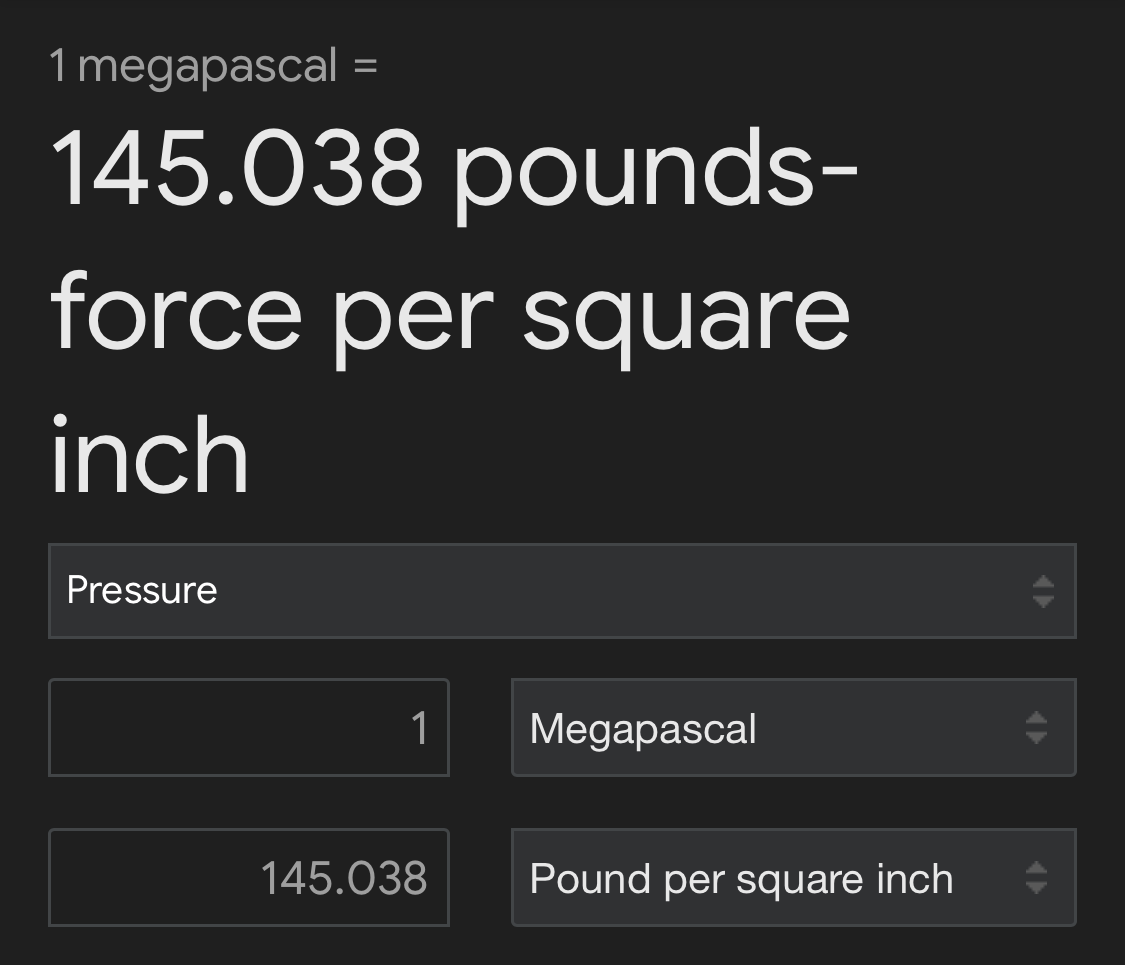

To convert from MPA to PSI

In [ ]:
# Converting Overburden pressure in MPA to PSI

overburden_psi = overburden_MPA_data * 145.038
overburden_psi

,Overburden
0,1433.809998
1,1435.656758
2,1437.036782
3,1438.309365
4,1439.523442
...,...
18418,22027.329443
18419,22028.647128
18420,22029.966931
18421,22031.284659


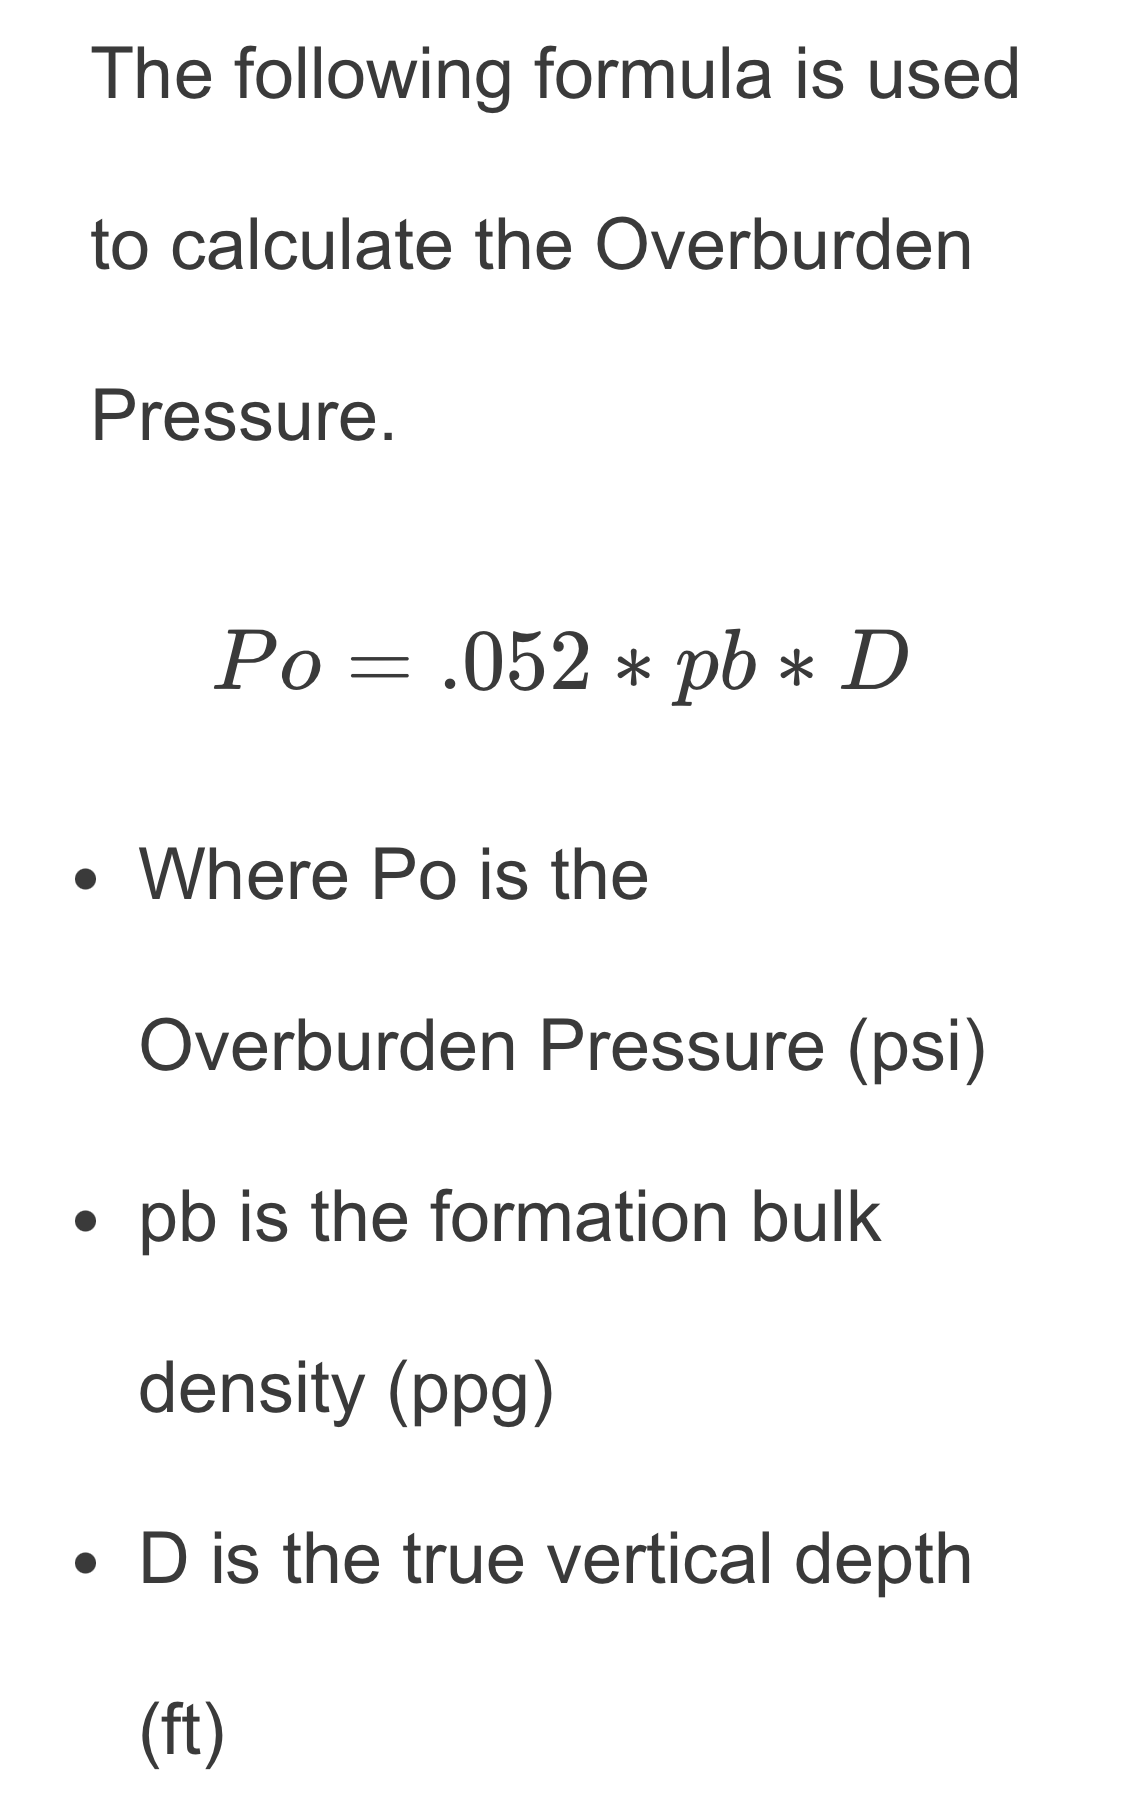

Converting Overburden to Density using the above formula

In [ ]:
#Converting overbuden psi to density (g/cm^3)  using a function "Cal_Density"
# assuming depth (ft)


def cal_density(depth_data, overburden_psi):
    density= (overburden_psi) / (0.052 * depth_data * 8.35)
    return density

# assigning obtained calculated Density into a list

Density = list()
index = 0

# iterating and calculating all density at corresponding depth (ft) and overburden pressure (PSI)
for index in range(len(depth_data)):
    Density.append(float(cal_density(depth_data[index],overburden_psi[index])))


# printing first 5 in the list

print(Density[:5])

[3302.1879267374347, 1653.22058688512, 1103.206495933312, 828.1375891783384, 663.0692961162949]


In [ ]:
# Creating a new column for Calculated Density and inserting it in column four

df.insert(4, "Cal_Density", Density)
df

,DEPTH,Formation,Static Poisson's Ratio,Overburden,Cal_Density,PorePressure,YM,CCS
0,1,1,0.386006,9.885754,3302.187927,6.201995,177.728124,4778.385375
1,2,1,0.386006,9.898487,1653.220587,6.209902,177.892291,4771.257985
2,3,1,0.386006,9.908002,1103.206496,6.215790,177.997146,4768.126901
3,4,1,0.386006,9.916776,828.137589,6.221212,178.088317,4765.915947
4,5,1,0.386006,9.925147,663.069296,6.226382,178.172022,4764.206153
...,...,...,...,...,...,...,...,...
18418,18419,1,0.386037,151.872816,2.754267,91.606362,1910.427491,78442.483616
18419,18420,1,0.386037,151.881901,2.754282,91.612925,1910.626514,78442.483616
18420,18421,1,0.386037,151.891000,2.754297,91.619497,1910.825770,78442.483616
18421,18422,1,0.386037,151.900086,2.754313,91.626061,1911.024828,78442.483616


In [ ]:
# Checking the correlation of each column against column YM to see which columns that is usable as features

correlation_with_YM = df.corr()["YM"]
print(correlation_with_YM)

DEPTH                     0.860616
Formation                -0.854582
Static Poisson's Ratio    0.926667
Overburden                0.892562
Cal_Density              -0.042473
PorePressure              0.898821
YM                        1.000000
CCS                       0.004956
Name: YM, dtype: float64


In [ ]:
# Though "Depth" column, "Static Pioson's Ratio" column show a good correlation they are not needed, so we decided to drop them. Likewise "CCS" column whose correlation is unsignificant to our work.
# Creating a new dataframe for building our model

data = {
    'Cal_Density': Density,
    'StaticPiosonRatio': static_pioson_ratio_data,
    'CCS': confined_compressive_strength_data,
    'PorePressure': pore_pressure_data,
    'Formation': formation_data,
    'YM' : young_modulus_data
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Save the new file for prediction
filename = 'newdata.csv'

# Write the DataFrame to a CSV file
df.to_csv(filename, index=False)  # index=False to avoid writing row indices

df = pd.read_csv('newdata.csv')

df.head()

,Cal_Density,StaticPiosonRatio,CCS,PorePressure,Formation,YM
0,3302.187927,0.386006,4778.385375,6.201995,1,177.728124
1,1653.220587,0.386006,4771.257985,6.209902,1,177.892291
2,1103.206496,0.386006,4768.126901,6.215790,1,177.997146
3,828.137589,0.386006,4765.915947,6.221212,1,178.088317
4,663.069296,0.386006,4764.206153,6.226382,1,178.172022


In [ ]:
#Importing necessary libraries to plot our features

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Scatter plot of Formation vs YM ')

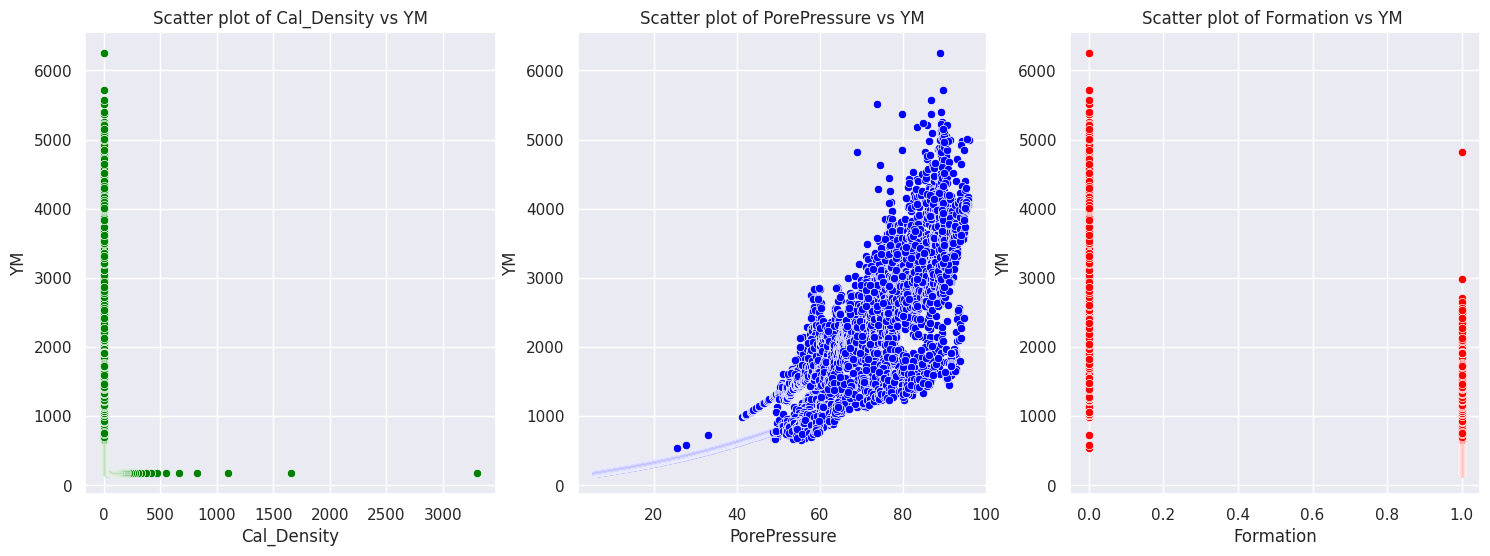

In [ ]:
# Set up the plotting style
sns.set(style="darkgrid")

# Creating a figure with subplots for scattered plot of Density, PorePressure, and Formation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Density vs YM
sns.scatterplot(data=data, x = 'Cal_Density', y = 'YM', color = 'green', ax = axes[0])
axes[0].set_title('Scatter plot of Cal_Density vs YM')

# Scatter plot for PorePressure vs YM
sns.scatterplot(data=data, x = 'PorePressure', y = 'YM', color = 'blue', ax = axes[1])
axes[1].set_title('Scatter plot of PorePressure vs YM')

# Scatter plot for Formation vs YM
sns.scatterplot(data=data, x = 'Formation', y = 'YM', color = 'red', ax = axes[2])
axes[2].set_title('Scatter plot of Formation vs YM ')

From the scattered plots above we can see that for Density, there is extreme skew towards low Cal_Density this suggests that most facies fall within a narrow density range.The Formation(Lithology) plot shows a wide spread out againts YM and proves the dominace of one formation over the other. PorePressure on the other hand shows an interesting distribution. The trend suggests that YM grows at an increasing rate with PorePressure, which might indicate a power-law or exponential relationship

## 3. Building the Deep Neural Network

In [ ]:
#importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout


In [ ]:
#Assigning features and labels respectively

x = df.drop(columns=["YM"])
y = data["YM"]

print(x[:5])
print(y[:5])

   Cal_Density  StaticPiosonRatio          CCS  PorePressure  Formation
0  3302.187927           0.386006  4778.385375      6.201995          1
1  1653.220587           0.386006  4771.257985      6.209902          1
2  1103.206496           0.386006  4768.126901      6.215790          1
3   828.137589           0.386006  4765.915947      6.221212          1
4   663.069296           0.386006  4764.206153      6.226382          1
0    177.728124
1    177.892291
2    177.997146
3    178.088317
4    178.172022
Name: YM, dtype: float64


In [ ]:
# assigning features to scale

features_to_scale = ["Cal_Density", "PorePressure", "Formation"]

In [ ]:
# Scale the features

scaler = StandardScaler()

# features matrix
features_scaled = scaler.fit_transform(x[features_to_scale])

In [ ]:
# spliting the data into training dataset, and validation set

# Split into training + validation and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(features_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Further split training + validation into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
x_test.shape, x_train.shape, y_test.shape, y_train.shape, x_val.shape, y_val.shape


((3685, 3), (11053, 3), (3685,), (11053,), (3685, 3), (3685,))

In [ ]:
# Building the model

ann_model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Input layer
    Dense(258, activation='relu'),     # first hidden layer
    Dropout(0.2),                      # Dropout to reduce overfitting
    Dense(128, activation='relu'),      # Second hidden layer
    Dropout(0.2),                      # Another dropout layer
    Dense(64, activation='relu'),      # Third hidden layer
    Dense(1, activation='linear')      # Output layer
])

In [ ]:
# Compile the model with a learning rate

ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Reduced learning rate
    loss='mse', metrics=['mae']
)

##4. Model Training

In [ ]:
# Train the model

model_trainer = ann_model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=150,          # Increased epochs for better training
    batch_size=16,       # Smaller batch size for finer updates
    verbose=1
)

Epoch 1/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 983726.0000 - mae: 559.4542 - val_loss: 58750.3789 - val_mae: 131.6597
Epoch 2/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 74117.6250 - mae: 147.6576 - val_loss: 61529.6797 - val_mae: 114.3496
Epoch 3/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 62401.5703 - mae: 135.0839 - val_loss: 47203.7773 - val_mae: 104.5931
Epoch 4/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 66178.1953 - mae: 134.8026 - val_loss: 46927.4102 - val_mae: 103.8632
Epoch 5/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 63142.3047 - mae: 131.7377 - val_loss: 49415.6172 - val_mae: 108.7012
Epoch 6/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 63784.7500 - mae: 132.4200 - val_loss: 45453.6211 - val_mae: 103.5462
Epoch 7/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 61131.8555 - mae: 128.6439 - val_loss: 45695.3398 - val_mae: 101.5115
Epoch 8/150
691/691 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 58342.1992 - mae: 126

## 5. Model Prediction and Evaluation

Visualizing loss and evaluating our model

In [ ]:
# Getting library for plotting

import matplotlib.pyplot as plt
import sklearn.metrics

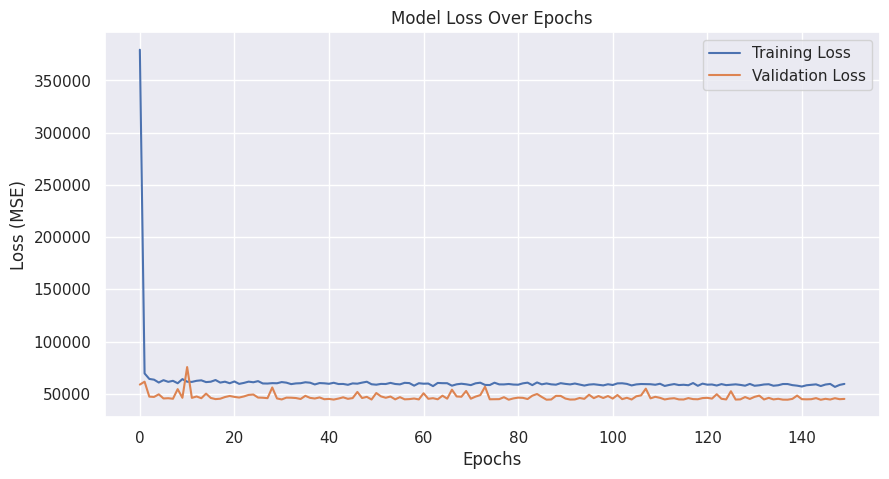

In [ ]:
# Plot training and validation loss

plt.figure(figsize=(10, 5))
plt.plot(model_trainer.history['loss'], label='Training Loss')
plt.plot(model_trainer.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [ ]:
# Step 1: Evaluate the model on the test set

test_loss, test_mae = ann_model.evaluate(x_test, y_test, verbose=1)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41424.5898 - mae: 92.4639


In [ ]:
# Displaying the evaluation results

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")

Test Loss (MSE): 45028.95
Test Mean Absolute Error (MAE): 96.61


In [ ]:
# Step 2: Make predictions

y_pred = ann_model.predict(x_test)

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Predict on the test set
test_predictions = ann_model.predict(x_test).flatten()

# Combine the actual and predicted values into a DataFrame
results_df = pd.DataFrame({
    'Model_test YM': y_test.values,
    'Model_Predicted YM': test_predictions
})

# Display the first few rows of the DataFrame
print(results_df.head(10))

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
   Model_test YM  Model_Predicted YM
0     631.598894          627.679138
1    2119.415738         2000.900024
2    3767.576443         3481.866455
3    2885.784842         2628.220459
4    2599.920293         2564.381836
5     677.155892          669.599060
6    2288.906558         2396.301025
7    2648.362107         2632.789062
8     760.871529          744.280579
9     301.260361          303.155273


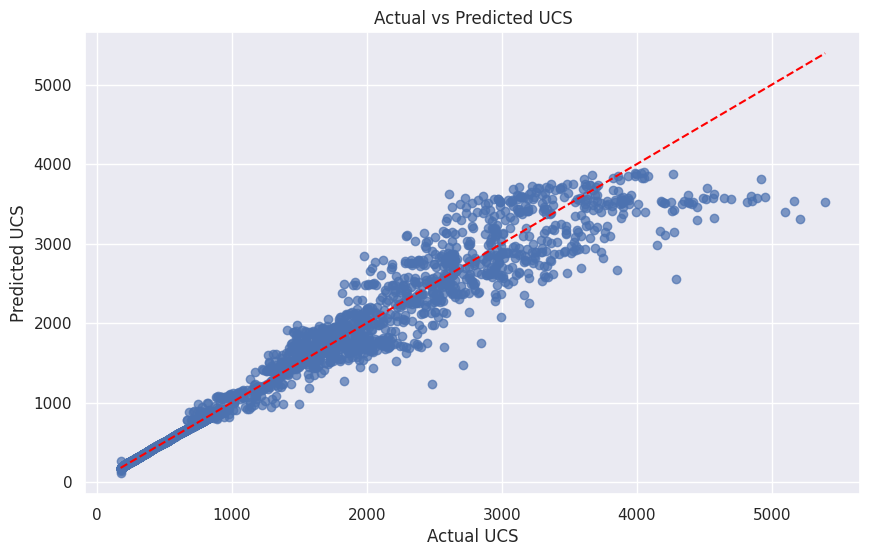

In [ ]:
# Step 3: Plot actual vs predicted UCS
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted UCS')
plt.xlabel('Actual UCS')
plt.ylabel('Predicted UCS')
plt.grid(True)
plt.show()

### Observations from the plot
#### Most predictions are close to the ideal line, meaning the model makes fairly accurate predictions.
#### Some predictions deviate more, but overall, the error is small relative to the range of YM values (1000-3000 MPa).


In [ ]:
# metric for model evaluation

evs_no=sklearn.metrics.explained_variance_score(y_test, ann_model.predict(x_test))
me_no=sklearn.metrics.max_error(y_test, ann_model.predict(x_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test, ann_model.predict(x_test))
mse_no=sklearn.metrics.mean_squared_error(y_test, ann_model.predict(x_test))
mape_no=sklearn.metrics.mean_absolute_percentage_error(y_test, ann_model.predict(x_test))
r2_no=sklearn.metrics.r2_score(y_test, ann_model.predict(x_test))

116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Absolute Percentage Error:',mape_no)
print('R^2 Score                :',r2_no)

Explained Variance Score: 0.9584071936869296
Max Error               : 1898.8692210937497
Mean Absolute Error     : 96.60841284934664
Mean Square Error       : 45028.95416255862
Mean Absolute Percentage Error: 0.04688251983969014
R^2 Score                : 0.9580698770012608


# Conclusion

The results indicate a highly accurate predictive model for Young's Modulus (YM), with an R² score of 0.958, demonstrating that the model explains 95.8% of the variance in the data.
The low Mean Absolute Percentage Error (MAPE) of 4.69% suggests that the model's predictions are quite reliable with minimal error.
However, the Max Error of 1898.87 suggests that there are some extreme cases where predictions deviate significantly, indicating possible outliers or complex relationships not fully captured by the model.


# Recommendation

To improve further, additional feature selection, hyperparameter tuning, or introducing more complex architectures such as ensemble models could enhance accuracy and robustness.